In [15]:
from ramachandraw.utils import plot, fetch_pdb, get_phi_psi
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [19]:
data_dir = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf/189_exp_ref_10000")
summary_file = Path(data_dir, "summary.csv")

summary_df = pd.read_csv(summary_file, index_col=0)
summary_df.head()

,r_free_7mhf,ff,pdb,xray_7mhf,w_0_7mhf,N,J,job_id,r_free_7mhg,xray_7mhg,...,w_9_7mhk,w_10_7mhk,w_11_7mhk,w_12_7mhk,w_13_7mhk,w_14_7mhk,w_15_7mhk,exp_delta,ref_delta,ref_ff_delta
0,0.317513,551.709904,/wynton/group/sali/mhancock/xray/sample_bench/...,5.625852,1.0,1,1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093513,0.0,0.0
1,NaN,356.272686,/wynton/group/sali/mhancock/xray/sample_bench/...,NaN,NaN,1,1,1,0.297537,5.526696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.092537,0.0,0.0
2,NaN,910.272376,/wynton/group/sali/mhancock/xray/sample_bench/...,NaN,NaN,1,1,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049092,0.0,0.0
3,NaN,1039.888789,/wynton/group/sali/mhancock/xray/sample_bench/...,NaN,NaN,1,1,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054967,0.0,0.0
4,NaN,442.542202,/wynton/group/sali/mhancock/xray/sample_bench/...,NaN,NaN,1,1,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056949,0.0,0.0


In [20]:
len(summary_df)

180

In [24]:
pdb_files = list()
Ns = [1, 2, 4, 8, 16]
Js = [1, 2, 3, 4, 5, 6]

phi_psi_arr = np.ndarray(shape=(max(summary_df.index), max(Ns)), dtype=object)
cif_subset = summary_df.dropna(subset=["xray_7mhh"])

for index in cif_subset.index:
    N = cif_subset.loc[index, "N"]
    J = cif_subset.loc[index, "J"]
    print(index, N, J)
    for j in range(N):
        pdb_file = Path(data_dir, "sample_states/{}_{}.pdb".format(index, j))
        phi_psi_arr[index, j] = get_phi_psi(str(pdb_file))

2 1 1
24 1 2
84 1 3
152 1 4
177 1 5
188 1 6
194 2 1
216 2 2
276 2 3
344 2 4
369 2 5
380 2 6
386 4 1
408 4 2
468 4 3
536 4 4
561 4 5
572 4 6
578 8 1
600 8 2
660 8 3
728 8 4
753 8 5
764 8 6
770 16 1
792 16 2
852 16 3
920 16 4
945 16 5
956 16 6


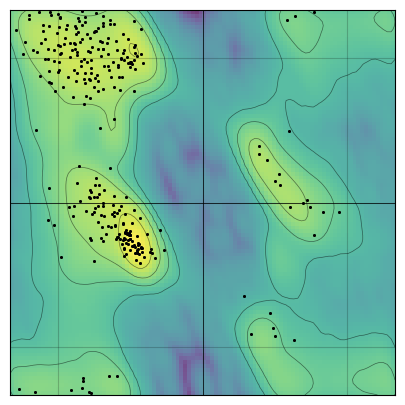

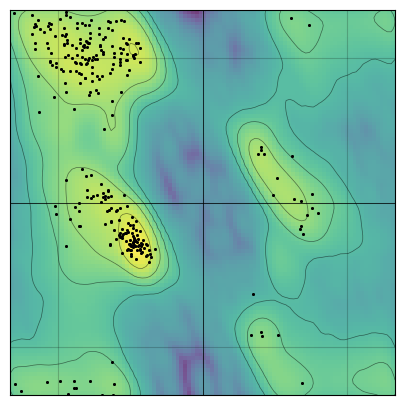

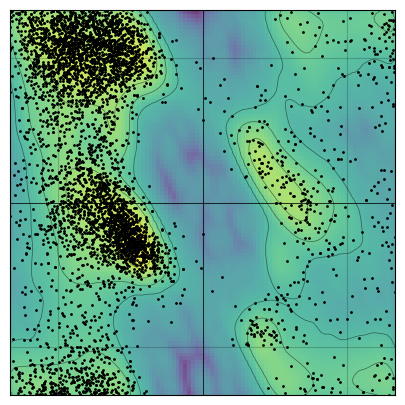

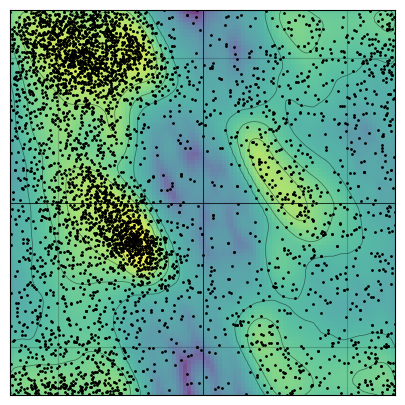

In [28]:
# ax = plot(str(pdb_files[0]), alpha=0.75, dpi=100, save=False, show=False)

for index in [2, 188, 770, 956]:
        # summary_id = cif_subset_df.loc[cif_subset_df["N"] == N].loc[cif_subset_df["J"] == Js[j]].index[0]

    pdb_file = Path(data_dir, "sample/{}.pdb".format(index))
    ax = plot(str(pdb_file), alpha=0.75, dpi=100, save=False, show=False)
    N = cif_subset.loc[index, "N"]
    for state in range(N):
        phi_psi_dict = phi_psi_arr[index, state]
        phis = [phi_psi_dict[key][0] for key in phi_psi_dict.keys()]
        psis = [phi_psi_dict[key][1] for key in phi_psi_dict.keys()]
        ax.scatter(phis, psis, s=1, c='black', marker='o')

    ax.get_figure().gca().set_title("")
    ax.get_figure().gca().set_xlabel("")
    ax.get_figure().gca().set_ylabel("")
    ax.locator_params(axis='x', nbins=4)
    ax.locator_params(axis='y', nbins=4)

    ax.tick_params(left=False, labelleft=False)
    ax.tick_params(bottom=False, labelbottom=False)

    plt.savefig(Path(Path.home(), "Desktop/rama_{}.png".format(index)))

        # for key in phi_psi_dict.keys():
        #     ax.scatter(phi_psi_dict[key][0], phi_psi_dict[key][1], s=1, c='black', marker='o')


    # plt.savefig(Path(Path.home(), "Desktop/rama_{}.png".format(J)))

# plt.show()

